In [1]:
"""
Name: fd_emission.ipynb
Authors: Stephan Meighen-Berger
Testing the emission rate of the creatures
"""

'\nName: fd_emission.ipynb\nAuthors: Stephan Meighen-Berger\nTesting the emission rate of the creatures\n'

In [2]:
"""
Imports
"""
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma
from scipy.signal import peak_widths, find_peaks
from scipy.optimize import root
import logging
import warnings
from scipy.stats import gamma
import sys
sys.path.append("../core/")

In [3]:
# Latex text rendering
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)

In [4]:
# Importing dob module
from fourth_day import FD
from fd_config import config

In [5]:
# Setting the debug level
# logging.basicConfig(level=logging.DEBUG)
# Turning off warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
fd = FD(org_filter='generous')

INFO: ---------------------------------------------------
INFO: ---------------------------------------------------
INFO: Welcome to FD!
INFO: This package will help you model deep sea bioluminescence!
INFO: ---------------------------------------------------
INFO: ---------------------------------------------------
INFO: Creating life...
INFO: Loading phyla according to config
INFO: Data extracted from Latz, M.I., Frank, T.M. & Case, J.F., Marine Biology 98 (1988)
INFO: Loading and parsing Cnidaria_Scyphomedusae.txt
INFO: Loading and parsing Cnidaria_Hydrozoa.txt
INFO: Loading and parsing Cnidaria_Hydrozoa_Hydroidolina_Siphonophores_Calycophorae.txt
INFO: Loading and parsing Cnidaria_Hydrozoa_Hydroidolina_Siphonophores_Physonectae.txt
INFO: Loading and parsing Proteobacteria_Gammaproteobacteria.txt
INFO: Creation finished
INFO: ---------------------------------------------------
INFO: ---------------------------------------------------
INFO: Initializing flood
INFO: Survivors collecte

In [6]:
# Solving
distances = np.logspace(0., 3, 20)
velocity = 0.3
light_yields = fd.solve(1000, velocity, distances, 1., run_count=1000)

INFO: ---------------------------------------------------
INFO: ---------------------------------------------------
INFO: Calculating light yields
INFO: Finished calculation
INFO: It took 88 seconds
INFO: ---------------------------------------------------
INFO: ---------------------------------------------------


In [7]:
std_size = 6.
fontsize = 20.
lw=3.

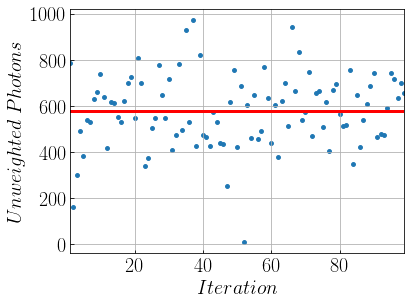

In [8]:
# Energy distributions
figure, ax = plt.subplots(figsize=(std_size, std_size * 6. / 8.))
iterations = range(1, 100)
res = np.array([fd.rate_model.rate(velocity, 1000, 1e6) for i in iterations])
mean = np.mean(res)
sigma = np.var(res)
ax.scatter(iterations, res, s=lw*5)
ax.axhline(np.mean(res), lw=lw, color='r')
ax.set_xlim(min(iterations), max(iterations))
# ax.set_ylim(0., 0.03)
ax.set_xscale('linear')
ax.set_yscale('linear')
ax.set_xlabel(r'$Iteration$', fontsize=fontsize)
ax.set_ylabel(r'$Unweighted\;Photons$', fontsize=fontsize)
ax.tick_params(axis = 'both', which = 'major', labelsize=fontsize, direction='in')
ax.tick_params(axis = 'both', which = 'minor', labelsize=fontsize, direction='in')
plt.grid(True)
plt.show()

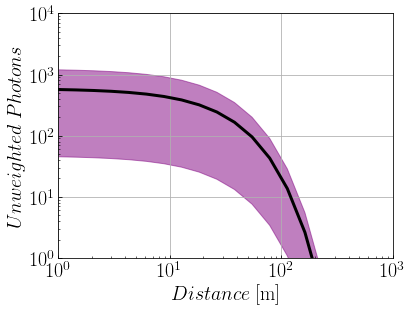

In [9]:
# Energy distributions
figure, ax = plt.subplots(figsize=(std_size, std_size * 6. / 8.))
mean = np.array([
    np.mean(light_yields[:, i])
    for i in range(len(distances))
])
max_var = np.array([
    np.max(light_yields[:, i])
    for i in range(len(distances))
])
min_var = np.array([
    np.min(light_yields[:, i])
    for i in range(len(distances))
])
ax.plot(distances, mean, lw=lw, color='k')
ax.fill_between(distances, min_var, max_var, color='purple', alpha=0.5)
ax.set_xlim(1e0, 1e3)
ax.set_ylim(1e0, 1e4)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$Distance\;[\mathrm{m}]$', fontsize=fontsize)
ax.set_ylabel(r'$Unweighted\;Photons$', fontsize=fontsize)
ax.tick_params(axis = 'both', which = 'major', labelsize=fontsize, direction='in')
ax.tick_params(axis = 'both', which = 'minor', labelsize=fontsize, direction='in')
plt.grid(True)
plt.show()